# Introduction to classification with Tensorflow
* Binary classification
* Multiclass classification
* Multilabel classification

### Creating data to view and fit

In [383]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# create circles

X,y = make_circles(n_samples, noise=0.03,random_state=42)

In [384]:
# checking the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [385]:
# check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [387]:
circles = pd.DataFrame({"X0": X[:,0],"X1": X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


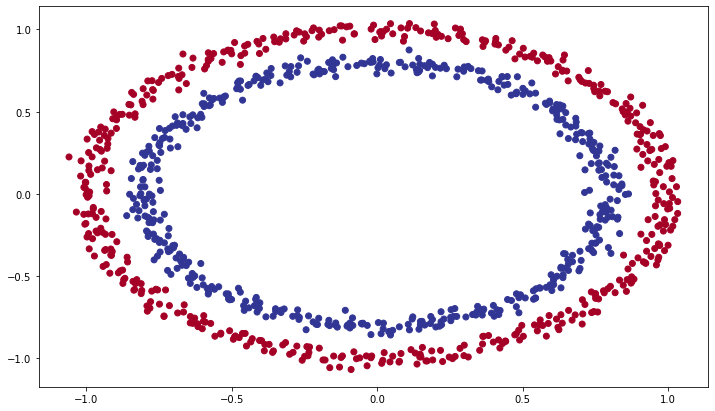

In [388]:
plt.figure(figsize=(12,7))
plt.scatter(X[:,0],X[:,1],c=y, cmap=plt.cm.RdYlBu)

In [389]:
len(X), len(y)

(1000, 1000)

In [390]:
X.shape, y.shape

((1000, 2), (1000,))

In [391]:
# View the example from each dataset
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in Modelling

In [392]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [393]:
import tensorflow as tf
# create classification model
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=10)
class_model = tf.keras.Sequential([tf.keras.Input(2),
                                  tf.keras.layers.Dense(50, activation="relu"),
                                  tf.keras.layers.Dense(1, activation="sigmoid")])
#Compile the model
class_model.compile(optimizer = tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=["accuracy"])

# fitting the model
class_model.fit(X_train, y_train, epochs=100)


Epoch 1/100
21/21 [==============================] - 0s 427us/step - loss: 0.6979 - accuracy: 0.4836
Epoch 2/100
21/21 [==============================] - 0s 380us/step - loss: 0.6939 - accuracy: 0.4896
Epoch 3/100
21/21 [==============================] - 0s 427us/step - loss: 0.6915 - accuracy: 0.4925
Epoch 4/100
21/21 [==============================] - 0s 427us/step - loss: 0.6894 - accuracy: 0.4896
Epoch 5/100
21/21 [==============================] - 0s 522us/step - loss: 0.6874 - accuracy: 0.5433
Epoch 6/100
21/21 [==============================] - 0s 427us/step - loss: 0.6851 - accuracy: 0.6149
Epoch 7/100
21/21 [==============================] - 0s 418us/step - loss: 0.6832 - accuracy: 0.7030
Epoch 8/100
21/21 [==============================] - 0s 570us/step - loss: 0.6817 - accuracy: 0.7045
Epoch 9/100
21/21 [==============================] - 0s 522us/step - loss: 0.6798 - accuracy: 0.6463
Epoch 10/100
21/21 [==============================] - 0s 427us/step - loss: 0.6782 - accura

21/21 [==============================] - 0s 380us/step - loss: 0.4356 - accuracy: 0.9985
Epoch 82/100
21/21 [==============================] - 0s 427us/step - loss: 0.4313 - accuracy: 0.9970
Epoch 83/100
21/21 [==============================] - 0s 427us/step - loss: 0.4278 - accuracy: 0.9970
Epoch 84/100
21/21 [==============================] - 0s 427us/step - loss: 0.4226 - accuracy: 0.9985
Epoch 85/100
21/21 [==============================] - 0s 427us/step - loss: 0.4189 - accuracy: 0.9985
Epoch 86/100
21/21 [==============================] - 0s 380us/step - loss: 0.4146 - accuracy: 0.9940
Epoch 87/100
21/21 [==============================] - 0s 380us/step - loss: 0.4102 - accuracy: 0.9970
Epoch 88/100
21/21 [==============================] - 0s 427us/step - loss: 0.4073 - accuracy: 0.9985
Epoch 89/100
21/21 [==============================] - 0s 380us/step - loss: 0.4022 - accuracy: 0.9985
Epoch 90/100
21/21 [==============================] - 0s 427us/step - loss: 0.3980 - accuracy: 

In [394]:
class_model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 453us/step - loss: 0.3826 - accuracy: 0.9970


[0.3825724422931671, 0.9969696998596191]

### Viewing the predictions of Data

In [395]:
class_model.predict(X_test)

array([[0.7919822 ],
       [0.31351632],
       [0.7279246 ],
       [0.33736423],
       [0.58462584],
       [0.58831006],
       [0.33886606],
       [0.25049794],
       [0.6798128 ],
       [0.26888818],
       [0.540062  ],
       [0.82177085],
       [0.24775493],
       [0.6291225 ],
       [0.45134217],
       [0.76773417],
       [0.69404936],
       [0.3494528 ],
       [0.7344586 ],
       [0.39988586],
       [0.26175272],
       [0.22135061],
       [0.7236438 ],
       [0.23041993],
       [0.32217866],
       [0.3991081 ],
       [0.31370035],
       [0.30467856],
       [0.294743  ],
       [0.75117815],
       [0.8004972 ],
       [0.26793015],
       [0.4835991 ],
       [0.6743794 ],
       [0.39061865],
       [0.661702  ],
       [0.6387522 ],
       [0.6520287 ],
       [0.6605594 ],
       [0.6696557 ],
       [0.6724388 ],
       [0.6794425 ],
       [0.74550897],
       [0.3179404 ],
       [0.37585205],
       [0.61283356],
       [0.35930327],
       [0.203

### To visualize your model prediction, let's create a function

* Take in trained model. feature (X) and labels (y)
* Create a meshgrid of the different X values
* Make the predictions across the meshgrid
* Plot the predictions as well as a line between zones(where the unique class fails)

In [396]:
import numpy as np

In [397]:
def plot_decision_boundary(model, X,y):
    # PLots the decision boundaries created by a model predicting on x
    x_min,x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
    y_min,y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1
    
    xx,yy = np.meshgrid(np.linspace(x_min,x_max,100), np.linspace(y_min,y_max,100))
    
    # create X value (we are going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    # make predictions
    y_pred = model.predict(x_in)
    
    # Check for multiclass
    if len(y_pred[0]) > 1:
        print("We are doing multi class predictions")
        
        # we have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    
    # plot the decision boundary
    plt.figure(figsize=(12,6))
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alphs=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=8, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())        

Doing binary classification


<ipython-input-397-d18300fbf234>:27: UserWarning: The following kwargs were not used by contour: 'alphs'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alphs=0.7)


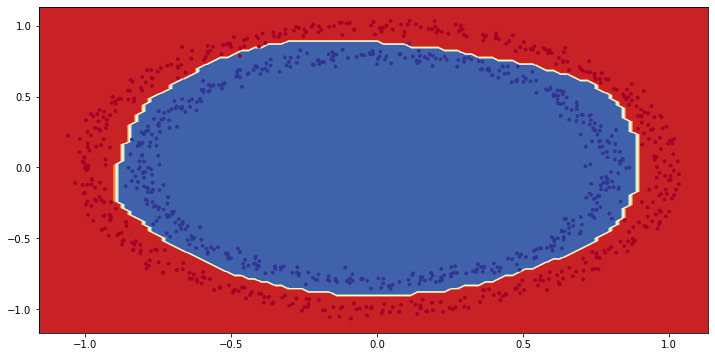

In [398]:
plot_decision_boundary(model=class_model, X=X, y=y)

In [399]:
x_min,x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
y_min,y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1
xx,yy = np.meshgrid(np.linspace(x_min,x_max,100), np.linspace(y_min,y_max,100))


In [400]:
yy.shape, xx.shape

((100, 100), (100, 100))

In [401]:
xx.ravel().shape

(10000,)

In [402]:
## Missing piece is Non-linearity; Straight line vs non-straight line

In [403]:
# Trying to build model with RelU

tf.random.set_seed(42)

model5 = tf.keras.Sequential([tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)])

# compile the mode

model5.compile(optimizer="Adam", loss=tf.keras.losses.binary_crossentropy, metrics=["accuracy"])

history = model5.fit(X_train, y_train, epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 427us/step - loss: 4.4138 - accuracy: 0.4582
Epoch 2/100
21/21 [==============================] - 0s 380us/step - loss: 4.3170 - accuracy: 0.4284
Epoch 3/100
21/21 [==============================] - 0s 380us/step - loss: 4.2013 - accuracy: 0.4119
Epoch 4/100
21/21 [==============================] - 0s 522us/step - loss: 4.1334 - accuracy: 0.4045
Epoch 5/100
21/21 [==============================] - 0s 475us/step - loss: 4.0524 - accuracy: 0.3955
Epoch 6/100
21/21 [==============================] - 0s 665us/step - loss: 4.0097 - accuracy: 0.3970
Epoch 7/100
21/21 [==============================] - 0s 475us/step - loss: 3.9028 - accuracy: 0.4104
Epoch 8/100
21/21 [==============================] - 0s 617us/step - loss: 3.8344 - accuracy: 0.4134
Epoch 9/100
21/21 [==============================] - 0s 522us/step - loss: 3.8218 - accuracy: 0.4209
Epoch 10/100
21/21 [==============================] - 0s 618us/step - loss: 3.8175 - accura

21/21 [==============================] - 0s 380us/step - loss: 0.8649 - accuracy: 0.4522
Epoch 82/100
21/21 [==============================] - 0s 475us/step - loss: 0.8630 - accuracy: 0.4537
Epoch 83/100
21/21 [==============================] - 0s 427us/step - loss: 0.8612 - accuracy: 0.4537
Epoch 84/100
21/21 [==============================] - 0s 427us/step - loss: 0.8593 - accuracy: 0.4537
Epoch 85/100
21/21 [==============================] - 0s 427us/step - loss: 0.8574 - accuracy: 0.4537
Epoch 86/100
21/21 [==============================] - 0s 427us/step - loss: 0.8557 - accuracy: 0.4537
Epoch 87/100
21/21 [==============================] - 0s 427us/step - loss: 0.8539 - accuracy: 0.4537
Epoch 88/100
21/21 [==============================] - 0s 427us/step - loss: 0.8521 - accuracy: 0.4537
Epoch 89/100
21/21 [==============================] - 0s 332us/step - loss: 0.8504 - accuracy: 0.4537
Epoch 90/100
21/21 [==============================] - 0s 427us/step - loss: 0.8487 - accuracy: 

In [404]:
# what if we try to change the no of neurons and activation functions
# and also added the activation function to sigmoid in last layer to provide probabilities.

tf.random.set_seed(42)

model6 = tf.keras.Sequential([tf.keras.layers.Input(2),
                             tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")
                             ])

model6.compile(optimizer="Adam", loss=tf.keras.losses.binary_crossentropy, metrics=["accuracy"])

model6.fit(X_train, y_train, epochs=100)

Epoch 1/100
21/21 [==============================] - 0s 427us/step - loss: 0.6919 - accuracy: 0.4881
Epoch 2/100
21/21 [==============================] - 0s 427us/step - loss: 0.6870 - accuracy: 0.5075
Epoch 3/100
21/21 [==============================] - 0s 427us/step - loss: 0.6840 - accuracy: 0.5194
Epoch 4/100
21/21 [==============================] - 0s 475us/step - loss: 0.6821 - accuracy: 0.5269
Epoch 5/100
21/21 [==============================] - 0s 475us/step - loss: 0.6812 - accuracy: 0.5284
Epoch 6/100
21/21 [==============================] - 0s 522us/step - loss: 0.6798 - accuracy: 0.5463
Epoch 7/100
21/21 [==============================] - 0s 475us/step - loss: 0.6792 - accuracy: 0.5582
Epoch 8/100
21/21 [==============================] - 0s 475us/step - loss: 0.6785 - accuracy: 0.5672
Epoch 9/100
21/21 [==============================] - 0s 438us/step - loss: 0.6779 - accuracy: 0.5672
Epoch 10/100
21/21 [==============================] - 0s 570us/step - loss: 0.6774 - accura

21/21 [==============================] - 0s 475us/step - loss: 0.6157 - accuracy: 0.6940
Epoch 82/100
21/21 [==============================] - 0s 432us/step - loss: 0.6132 - accuracy: 0.7194
Epoch 83/100
21/21 [==============================] - 0s 475us/step - loss: 0.6110 - accuracy: 0.7224
Epoch 84/100
21/21 [==============================] - 0s 427us/step - loss: 0.6084 - accuracy: 0.7269
Epoch 85/100
21/21 [==============================] - 0s 427us/step - loss: 0.6059 - accuracy: 0.7358
Epoch 86/100
21/21 [==============================] - 0s 475us/step - loss: 0.6035 - accuracy: 0.7463
Epoch 87/100
21/21 [==============================] - 0s 427us/step - loss: 0.6007 - accuracy: 0.7418
Epoch 88/100
21/21 [==============================] - 0s 427us/step - loss: 0.5986 - accuracy: 0.7537
Epoch 89/100
21/21 [==============================] - 0s 380us/step - loss: 0.5956 - accuracy: 0.7522
Epoch 90/100
21/21 [==============================] - 0s 427us/step - loss: 0.5920 - accuracy: 

In [405]:
model6.evaluate(X_test, y_test)

11/11 [==============================] - 0s 453us/step - loss: 0.5759 - accuracy: 0.6970


[0.5758981704711914, 0.6969696879386902]

Doing binary classification


<ipython-input-397-d18300fbf234>:27: UserWarning: The following kwargs were not used by contour: 'alphs'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alphs=0.7)


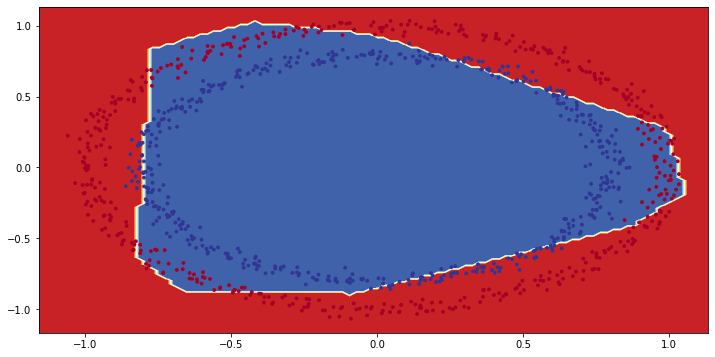

In [406]:
# how do our model prediction works
plot_decision_boundary(model6, X,y)

In [407]:
### Relu and Sigmoid functions

def relu(x):
    return tf.maximum(0,x)

def sigmoid(x):
    return 1/(1 + tf.exp(-x))

# pass our tensor to our custom function
A = relu(np.arange(-10,10,1))

B = sigmoid(tf.constant(np.arange(-10,10,1), dtype=tf.float32))

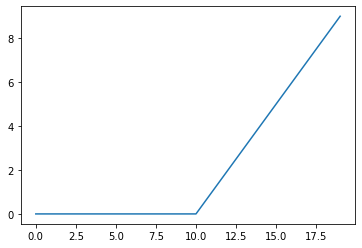

In [408]:
plt.plot(A)

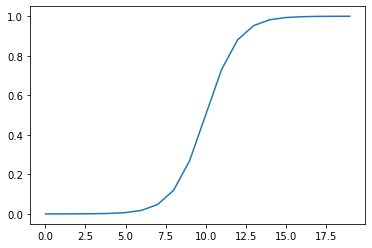

In [409]:
plt.plot(B)

In [410]:
import tensorflow as tf
# create classification model
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=10)
class_model1 = tf.keras.Sequential([tf.keras.Input(2),
                                  tf.keras.layers.Dense(50, activation="relu"),
                                  tf.keras.layers.Dense(1, activation="sigmoid")])
#Compile the model
class_model1.compile(optimizer = tf.keras.optimizers.Adam(lr=0.01), loss=tf.keras.losses.binary_crossentropy, metrics=["accuracy"])

# fitting the model
history = class_model1.fit(X_train, y_train, epochs=25)

Epoch 1/25
21/21 [==============================] - 0s 427us/step - loss: 0.6958 - accuracy: 0.4791
Epoch 2/25
21/21 [==============================] - 0s 427us/step - loss: 0.6740 - accuracy: 0.6970
Epoch 3/25
21/21 [==============================] - 0s 427us/step - loss: 0.6576 - accuracy: 0.7507
Epoch 4/25
21/21 [==============================] - 0s 570us/step - loss: 0.6369 - accuracy: 0.7642
Epoch 5/25
21/21 [==============================] - 0s 475us/step - loss: 0.6089 - accuracy: 0.7567
Epoch 6/25
21/21 [==============================] - 0s 475us/step - loss: 0.5842 - accuracy: 0.7701
Epoch 7/25
21/21 [==============================] - 0s 427us/step - loss: 0.5466 - accuracy: 0.9030
Epoch 8/25
21/21 [==============================] - 0s 522us/step - loss: 0.5013 - accuracy: 0.9493
Epoch 9/25
21/21 [==============================] - 0s 475us/step - loss: 0.4614 - accuracy: 0.9687
Epoch 10/25
21/21 [==============================] - 0s 475us/step - loss: 0.4190 - accuracy: 0.9507

In [411]:
class_model1.evaluate(X_test, y_test)

11/11 [==============================] - 0s 363us/step - loss: 0.1429 - accuracy: 0.9788


[0.14290493726730347, 0.978787899017334]

Text(0.5, 1.0, 'loss and accuracy curve')

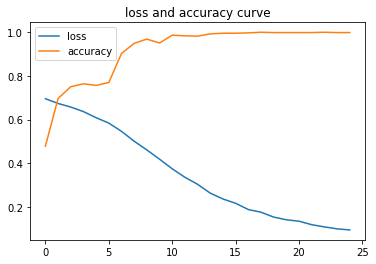

In [412]:
## convert the history in a dataFrame

pd.DataFrame(history.history).plot()
plt.title("loss and accuracy curve")

### Method to find the ideal learning rate,which helps us to reduce the loss as fast as possible.
To find the ideal learning rate, we can use the following steps - 
** callback - An extra piece of functionality which you can add while it's training
** Another one - A modified loss curve, loss vs learning curve to view the comparison.

In [413]:
tf.random.set_seed(42)

model9 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(4, activation="relu"),
                             tf.keras.layers.Dense(1, activation="sigmoid")])

model9.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history9 = model9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
21/21 [==============================] - 1s 46ms/step - loss: 0.6943 - accuracy: 0.4881
Epoch 2/100
21/21 [==============================] - 0s 475us/step - loss: 0.6936 - accuracy: 0.4866
Epoch 3/100
21/21 [==============================] - 0s 427us/step - loss: 0.6929 - accuracy: 0.4851
Epoch 4/100
21/21 [==============================] - 0s 427us/step - loss: 0.6921 - accuracy: 0.4896
Epoch 5/100
21/21 [==============================] - 0s 475us/step - loss: 0.6914 - accuracy: 0.4970
Epoch 6/100
21/21 [==============================] - 0s 522us/step - loss: 0.6905 - accuracy: 0.5015
Epoch 7/100
21/21 [==============================] - 0s 475us/step - loss: 0.6896 - accuracy: 0.4955
Epoch 8/100
21/21 [==============================] - 0s 475us/step - loss: 0.6886 - accuracy: 0.5030
Epoch 9/100
21/21 [==============================] - 0s 522us/step - loss: 0.6877 - accuracy: 0.5045
Epoch 10/100
21/21 [==============================] - 0s 570us/step - loss: 0.6867 - accurac

21/21 [==============================] - 0s 475us/step - loss: 0.5082 - accuracy: 0.7866
Epoch 82/100
21/21 [==============================] - 0s 427us/step - loss: 0.5951 - accuracy: 0.6761
Epoch 83/100
21/21 [==============================] - 0s 475us/step - loss: 0.6693 - accuracy: 0.5284
Epoch 84/100
21/21 [==============================] - 0s 427us/step - loss: 0.7206 - accuracy: 0.4940
Epoch 85/100
21/21 [==============================] - 0s 427us/step - loss: 0.6886 - accuracy: 0.5463
Epoch 86/100
21/21 [==============================] - 0s 427us/step - loss: 0.6892 - accuracy: 0.5448
Epoch 87/100
21/21 [==============================] - 0s 427us/step - loss: 0.7654 - accuracy: 0.4866
Epoch 88/100
21/21 [==============================] - 0s 475us/step - loss: 0.7943 - accuracy: 0.5433
Epoch 89/100
21/21 [==============================] - 0s 427us/step - loss: 0.7977 - accuracy: 0.4955
Epoch 90/100
21/21 [==============================] - 0s 427us/step - loss: 0.7600 - accuracy: 

<AxesSubplot:>

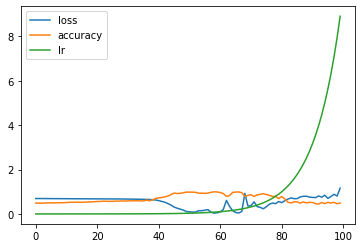

In [414]:
pd.DataFrame(history9.history).plot()

In [415]:
# plot the learning rate vs the loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning Rate vs Loss')

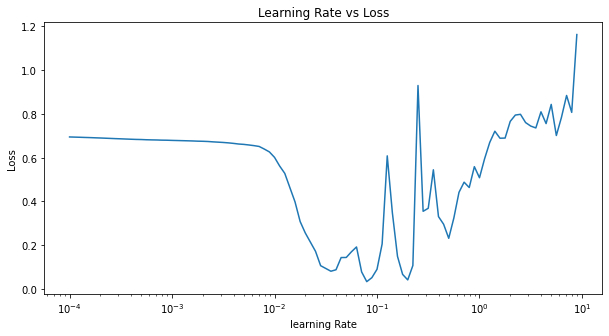

In [416]:
plt.figure(figsize=(10,5))
plt.semilogx(lrs, history9.history["loss"]) # this is important to plot the curve
plt.xlabel("learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [417]:
# Another example of typical learning rate is (0.0001 - 1)

In [418]:
# Let's try to use a higher *ideal* learning rate with the same model

tf.random.set_seed(42)

model10 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(1, activation="sigmoid")])
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

model10.compile(optimizer= tf.keras.optimizers.Adam(lr=0.02), loss= tf.keras.losses.binary_crossentropy, metrics=["accuracy"])

history10 = model10.fit(X_train, y_train, epochs=20)

Epoch 1/20
21/21 [==============================] - 0s 569us/step - loss: 0.6815 - accuracy: 0.5537
Epoch 2/20
21/21 [==============================] - 0s 522us/step - loss: 0.6679 - accuracy: 0.6045
Epoch 3/20
21/21 [==============================] - 0s 427us/step - loss: 0.6484 - accuracy: 0.6209
Epoch 4/20
21/21 [==============================] - 0s 475us/step - loss: 0.6126 - accuracy: 0.6985
Epoch 5/20
21/21 [==============================] - 0s 522us/step - loss: 0.5617 - accuracy: 0.7627
Epoch 6/20
21/21 [==============================] - 0s 522us/step - loss: 0.4819 - accuracy: 0.8612
Epoch 7/20
21/21 [==============================] - 0s 522us/step - loss: 0.3675 - accuracy: 0.9373
Epoch 8/20
21/21 [==============================] - 0s 475us/step - loss: 0.2725 - accuracy: 0.9716
Epoch 9/20
21/21 [==============================] - 0s 475us/step - loss: 0.1967 - accuracy: 0.9851
Epoch 10/20
21/21 [==============================] - 0s 522us/step - loss: 0.1424 - accuracy: 0.9925

In [419]:
pd.DataFrame(history10.history)

,loss,accuracy
0,0.681549,0.553731
1,0.667864,0.604478
2,0.648428,0.620896
3,0.612584,0.698507
4,0.561749,0.762687
5,0.481948,0.861194
6,0.367519,0.937313
7,0.272476,0.971642
8,0.196675,0.985075
9,0.142408,0.992537


In [420]:
model10.evaluate(X_train,y_train)

21/21 [==============================] - 0s 379us/step - loss: 0.0484 - accuracy: 0.9866


[0.04837936908006668, 0.9865671396255493]

Doing binary classification


<ipython-input-397-d18300fbf234>:27: UserWarning: The following kwargs were not used by contour: 'alphs'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alphs=0.7)


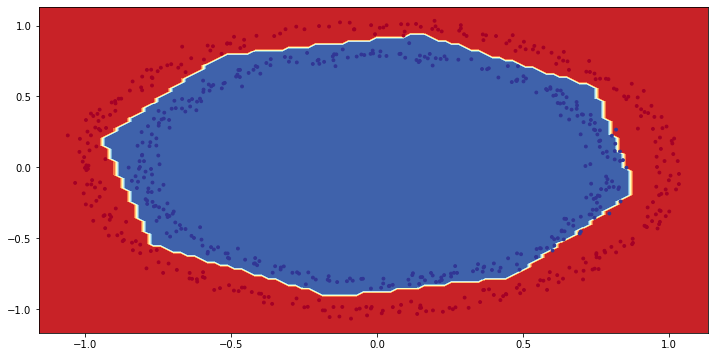

In [421]:
plot_decision_boundary(model=model10, X=X_train, y=y_train)

Doing binary classification
Doing binary classification


<ipython-input-397-d18300fbf234>:27: UserWarning: The following kwargs were not used by contour: 'alphs'
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alphs=0.7)


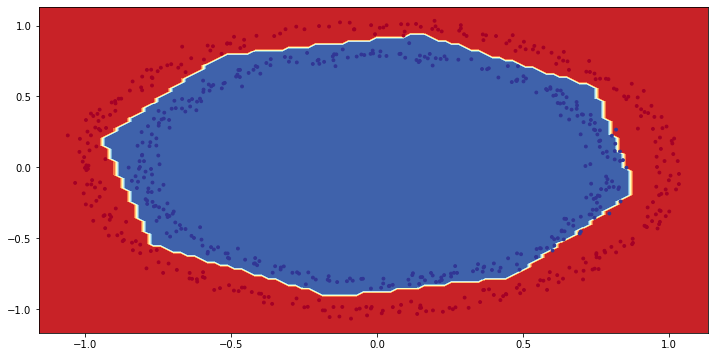

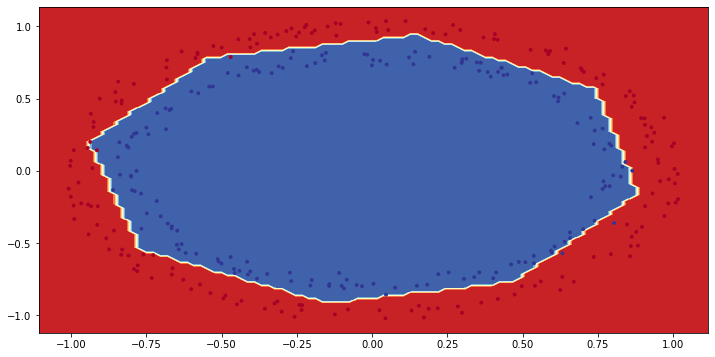

In [422]:
# plt.figure(figsize=(14,6))
# plt.subplot(1,2,1)
# plt.title("Training")
plot_decision_boundary(model=model10, X=X_train, y=y_train)
# plt.subplot(1,2,2)
# plt.title("Test")
plot_decision_boundary(model10, X=X_test, y=y_test)
# plt.show()

# More classification Evaluation methods -
 - Confusion Matrix
 - Classification report Matrix
 - Accuracy, precision, F1 Score, Recall

In [423]:
# Check the accuracy of your model

loss, accuracy =  model10.evaluate(X_test, y_test)
print("Model loss on the test set is ", loss)
print(f"Model accuracy on the test set is :{(accuracy):.2f}%")



11/11 [==============================] - 0s 544us/step - loss: 0.0679 - accuracy: 0.9818
Model loss on the test set is  0.06794567406177521
Model accuracy on the test set is :0.98%


In [424]:
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model10.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

array([[172,   2],
       [  4, 152]], dtype=int64)

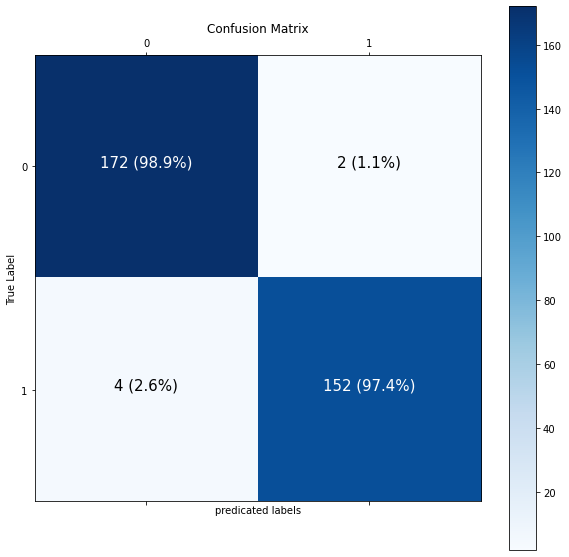

In [425]:
## We will try to visualize the confusion matrix so that it makes more sense with annotations.
## GO through this code again in depth

import itertools

figsize = (10, 10)

## create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix, np.newaxis will add additional
                                                            # dimension to the dataset
n_classes = cm.shape[0]

# Let's make it better

fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes

classes = False

if classes:
    lables = classes
else:
    labels = np.arange(cm.shape[0])

#Label the axis

ax.set(title="Confusion Matrix",
      xlabel = "predicated labels",
      ylabel = "True Label",
      xticks  = np.arange(n_classes),
      yticks = np.arange(n_classes),
      xticklabels = labels,
      yticklabels = labels)

# set threshold for different colors

threshold = (cm.max() + cm.min())/2.

# plot the test for each cell

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i,j] > threshold else "black",
             size=15)

### Working with Multi-class classification model -
When you have more than 2 classes in the labels or options, it's known as ** multiclass classification** 


In [543]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has been already sorted into the training and test data

(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [548]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [544]:
# Show the training example

print(f"Training sample:\n{train_data[0]}")
print(f"Training label:/n{train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [428]:
# check the shape of a single example

train_data[0].shape, train_labels[0].shape

((28, 28), ())

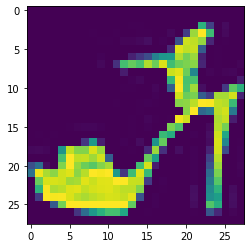

In [429]:
# plot a single example

import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_data[9])

In [430]:
train_labels[9]

5

In [431]:
# Create a small list so we can index the numerical labels to actual items name

class_name = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt", "Sneaker","Bag","Ankle boot"]

len(class_name)

10

Text(0.5, 1.0, 'Coat')

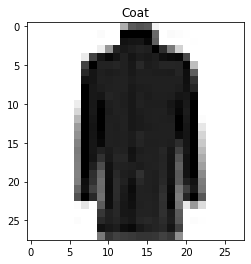

In [432]:
# plot an example image and it's label 
index_of_label= 75
plt.imshow(train_data[index_of_label], cmap=plt.cm.binary)
plt.title(class_name[train_labels[index_of_label]])

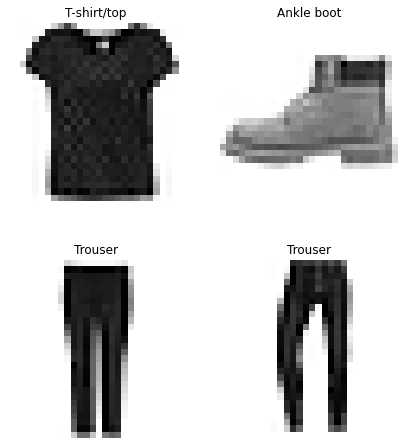

In [433]:
# plot random image of fashion mnist
import random
plt.figure(figsize=(7,8))
for i in range(4):
    ax =  plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_name[train_labels[rand_index]])
    plt.axis(False)

### building the multi class model, we can use the same architecture similar to binary classification.
-- input shape (28 * 28)
-- modify the output shape (10, activation = "softmax")
-- the loss function will be tf.keras.losses.CategoricalCrossEntropy()


In [434]:
# Our data needs a flatten model
flatten_model = tf.keras.Sequential(tf.keras.layers.Flatten(input_shape=(28,28)))
flatten_model.output_shape

(None, 784)

In [435]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [436]:
## If the labels are in one-hot encoded form then use the CategoricalCrossEntropy function but if the labels are integers then
## use the sparseCategoricalCrossEntropy function

# Set the random seed
tf.random.set_seed(42)

# Build our neural network
model11 =  tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)])
# compile the model
model11.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"])

# Fit the model

non_norm_history = model11.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10,
                               validation_data=(test_data,tf.one_hot(test_labels,depth=10)))
                               
                               
                               
    

Epoch 1/10
1875/1875 [==============================] - 1s 584us/step - loss: 2.1595 - accuracy: 0.1630 - val_loss: 1.8121 - val_accuracy: 0.2138
Epoch 2/10
1875/1875 [==============================] - 1s 509us/step - loss: 1.7001 - accuracy: 0.2530 - val_loss: 1.6497 - val_accuracy: 0.2853
Epoch 3/10
1875/1875 [==============================] - 1s 507us/step - loss: 1.6252 - accuracy: 0.2843 - val_loss: 1.6026 - val_accuracy: 0.2916
Epoch 4/10
1875/1875 [==============================] - 1s 513us/step - loss: 1.6016 - accuracy: 0.2903 - val_loss: 1.5929 - val_accuracy: 0.3068
Epoch 5/10
1875/1875 [==============================] - 1s 511us/step - loss: 1.5829 - accuracy: 0.3030 - val_loss: 1.5754 - val_accuracy: 0.3154
Epoch 6/10
1875/1875 [==============================] - 1s 509us/step - loss: 1.5676 - accuracy: 0.3153 - val_loss: 1.5407 - val_accuracy: 0.3322
Epoch 7/10
1875/1875 [==============================] - 1s 509us/step - loss: 1.5244 - accuracy: 0.3510 - val_loss: 1.4987 -

In [437]:
# Check the model Summary

model11.summary()

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_132 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_133 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_134 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [438]:
# Turn all the data in the numerical form
# Make sure that all of your tensors are in right shape
# Scaler features(normalize or standardize), neural network tends to prefer normalization.

In [439]:
# we can get or input data normalized or scaled

train_data.min(), train_data.max()

(0, 255)

In [440]:
train_data_norm = train_data/255.0
test_data_noram = test_data/255.0

In [441]:
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

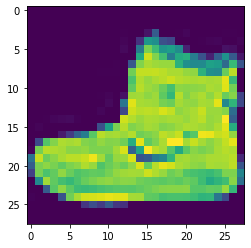

In [442]:
plt.imshow(train_data_norm[0])

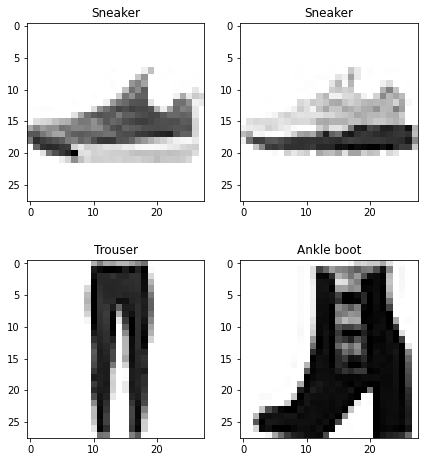

In [443]:
# to visualize the data
import random
plt.figure(figsize=(7,8))
for i in range(4):
    rand_index =  random.choice(range(len(train_data_norm)))
    ax = plt.subplot(2,2,i+1)
    plt.imshow(train_data_norm[rand_index], cmap=plt.cm.binary)
    plt.title(class_name[train_labels[rand_index]])
    

In [444]:
# lets build the model using normalized data

tf.random.set_seed(42)

# build the model
model12 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)])

model12.compile(optimizer=tf.keras.optimizers.Adam(),
               loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=["accuracy"])

# fit the model
norm_history = model12.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_noram, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 766us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 1s 648us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 1s 661us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 1s 772us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 1s 704us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 1s 725us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

<AxesSubplot:title={'center':'Non-normalized data'}>

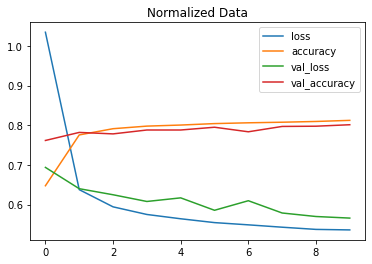

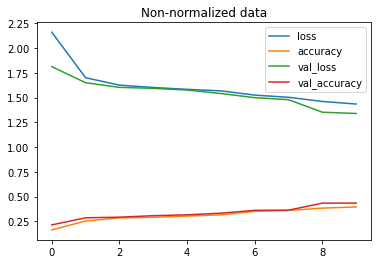

In [445]:
pd.DataFrame(norm_history.history).plot(title="Normalized Data")
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")

##### When comparing the results of same model even *slightly* with same dataset, So when you are comparing two models make sure that
##### that you are comparing two models with same data or same models with different dataset.`

In [446]:
# Finding the ideal learning rate
# set the random seed
tf.random.set_seed(42)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3 *10**(epoch/20))

#Create model
model13 =  tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4,activation='relu'),
                               tf.keras.layers.Dense(4,activation="relu"),
                               tf.keras.layers.Dense(10,activation="softmax")])

# compile the model
model13.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               metrics=["accuracy"])

# fit the model
history_lr = model13.fit(train_data_norm, train_labels, epochs=40,
            validation_data=(test_data_noram, test_labels), callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 1s 755us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 1s 715us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 1s 740us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 1s 716us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 1s 735us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 1s 724us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 1s 720us/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 -

In [447]:
pd.DataFrame(history_lr.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,1.034784,0.647433,0.693734,0.7617,0.001000
1,0.636577,0.775900,0.640036,0.7808,0.001122
2,0.593379,0.791150,0.627756,0.7770,0.001259
3,0.574939,0.796950,0.612176,0.7871,0.001413
4,0.565479,0.798683,0.606124,0.7913,0.001585
5,0.556948,0.802217,0.591709,0.7940,0.001778
6,0.554244,0.803583,0.589831,0.7896,0.001995
7,0.550886,0.803867,0.582860,0.7949,0.002239
8,0.546799,0.804667,0.603628,0.7833,0.002512
9,0.547823,0.805800,0.573599,0.7974,0.002818


Text(0.5, 1.0, 'Finding the ideal learning rate')

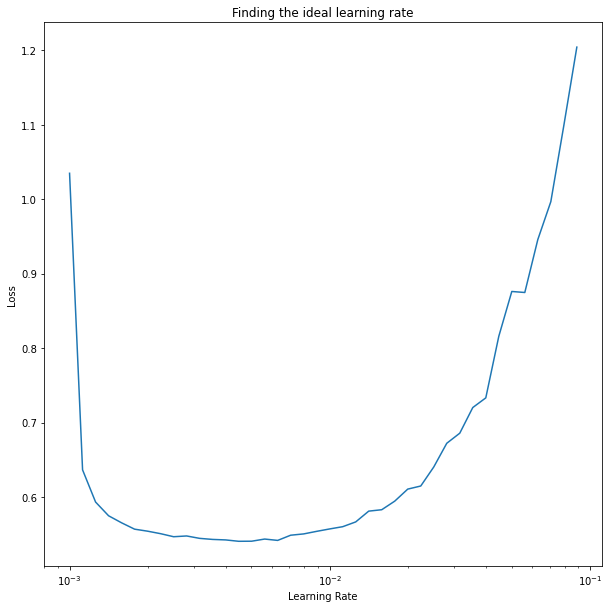

In [448]:
plt.figure(figsize=(10,10))

lrs = 1e-3 *(10**(tf.range(40)/20))
plt.semilogx(lrs,history_lr.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [449]:
## In the above learning rate curve you can figure out tha the best learning rate is 0.001

tf.random.set_seed(42)

# Create model
model14 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(4, activation="relu"),
                              tf.keras.layers.Dense(10, activation="softmax")])


# compile your model

model14.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001),
               loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                metrics=["accuracy"])

# fit my model
history_bestlr = model14.fit(train_data_norm, train_labels, epochs=40, validation_data=(test_data_noram, test_labels))
                

Epoch 1/40
1875/1875 [==============================] - 2s 936us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 2s 843us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 1s 793us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 1s 751us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 1s 738us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 2s 845us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 2s 939us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

In [450]:
model14.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_141 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_142 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_143 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

<Figure size 720x720 with 0 Axes>

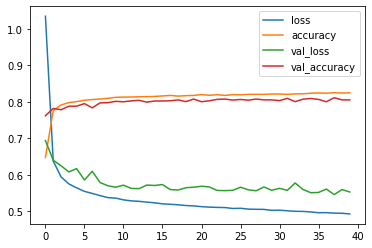

In [451]:
plt.figure(figsize=(10,10))
pd.DataFrame(history_bestlr.history).plot()

#### Evalulating our multi-class classification model

To evaluate our multi-class classification model, we could - 
* Evaluate its performance using other classification metrics (such as confusion matrix).
* Assess some of its prediction (through visualization).
* Improve the results (by training it for longer or changing the architecture)
* save and export it for use with the application

In [463]:
# Create a confusion matrix


## We will try to visualize the confusion matrix so that it makes more sense with annotations.
## GO through this code again in depth

from sklearn.metrics import confusion_matrix
import itertools

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

    ## create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix, np.newaxis will add additional
                                                                # dimension to the dataset
    n_classes = cm.shape[0]

    # Let's make it better

    fig, ax = plt.subplots(figsize=figsize)

    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    #Label the axis

    ax.set(title="Confusion Matrix",
          xlabel = "predicated labels",
          ylabel = "True Label",
          xticks  = np.arange(n_classes),
          yticks = np.arange(n_classes),
          xticklabels = labels,
          yticklabels = labels)
    
    
    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # set threshold for different colors

    threshold = (cm.max() + cm.min())/2.

    # plot the test for each cell

    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i,j] > threshold else "black",
                 size=text_size)

In [453]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [454]:
# Make some predictions with our model
y_probs =  model14.predict(test_data_noram) # probs is short for prediction probablity

# view the first 5 predictions
y_probs[0],tf.argmax(y_probs[0])

(array([1.8836063e-10, 9.2819058e-11, 1.5409312e-05, 5.4335476e-07,
        1.8994167e-05, 2.8970218e-01, 4.3930569e-08, 4.3807577e-02,
        4.2745401e-03, 6.6218066e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [455]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [456]:
y_preds = y_probs.argmax(axis=1)

In [457]:
y_preds

array([9, 2, 1, ..., 3, 1, 5], dtype=int64)

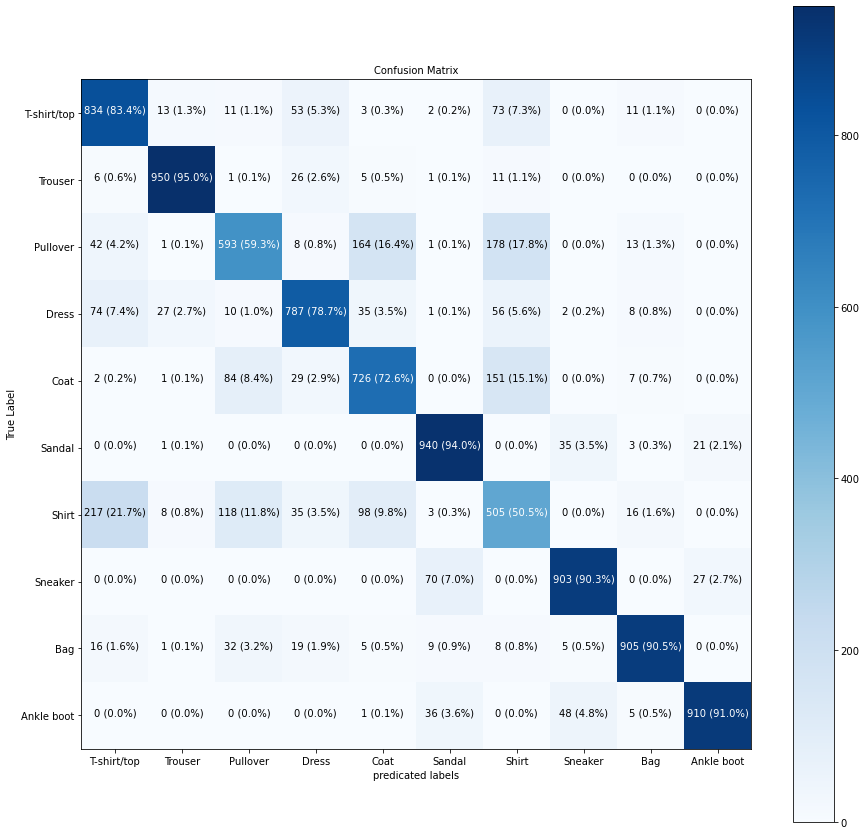

In [464]:
make_confusion_matrix(test_labels,y_preds,classes=class_name, figsize=(15,15), text_size=10)

** Note -- often when working with images and other forms of visual data, it's a good idea to visualize as much as possibel to
develop a further understanding of the data and input and outputs of the model
Functions to ---
-- PLot a random image
-- Make a prediction on said image
-- Label the plot with the truth label and the prediction label

In [559]:
import random
def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image,plots it and labels it with a prediction and truth label
    """
    i = random.choice(range(len(test_data)))
    target_image = images[i]
    pred_prob = model.predict(target_image.reshape(-1,28,28,1))
    true_label = classes[true_labels[i]]
    pred_label = classes[pred_prob.argmax()]
    
    # plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)
    
    if true_label == pred_label:
        color = "green"
    else:
        color = "red"
        
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_prob),
                                                    true_label),
              color=color)
    

9

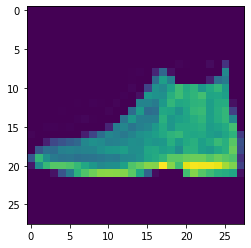

In [571]:
random.choice(range(len(test_data)))
plt.imshow(test_data[0])
#model14.predict(test_data)
test_data[0].shape
test_labels[0]

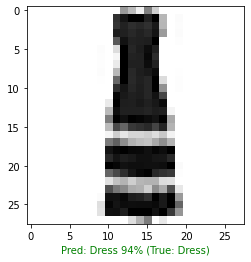

In [567]:
plot_random_image(model14, test_data_noram, test_labels,class_name)

In [555]:
# What pattern is exactly our model is learning
model14.layers

In [535]:
# Extract a particular layer
model14.layers[1]

In [539]:
# Get the patterns of a layer in our network
weights, biases = model14.layers[1].get_weights()

# Weights and shape
weights, weights.shape

(array([[ 1.5932962 , -0.76869935, -1.5784491 , -1.9988161 ],
        [ 0.45667905, -1.2957743 , -0.7322073 , -0.16243047],
        [ 1.3499513 , -0.20023088, -1.9897623 , -1.2142687 ],
        ...,
        [-0.21869308,  0.5934666 , -0.27281857,  0.46215135],
        [-0.21825396,  1.1962787 ,  0.5423639 , -0.57917523],
        [ 0.37464732, -0.1999169 ,  0.02721524,  0.24650967]],
       dtype=float32),
 (784, 4))

In [572]:
weights, weights.shape

(array([[ 1.5932962 , -0.76869935, -1.5784491 , -1.9988161 ],
        [ 0.45667905, -1.2957743 , -0.7322073 , -0.16243047],
        [ 1.3499513 , -0.20023088, -1.9897623 , -1.2142687 ],
        ...,
        [-0.21869308,  0.5934666 , -0.27281857,  0.46215135],
        [-0.21825396,  1.1962787 ,  0.5423639 , -0.57917523],
        [ 0.37464732, -0.1999169 ,  0.02721524,  0.24650967]],
       dtype=float32),
 (784, 4))

In [574]:
biases, biases.shape

(array([ 0.3310022 , -0.01015092, -0.15789714,  1.2011381 ], dtype=float32),
 (4,))

#### There will be one bias per hidden unit(Neuron) and there will be weight for each datapoint in the input.
The bias vector is initialized with zeroes initially,bias vector dictates howmuch the pattern within the corresponding weight matrix should influence the next layer.

In [575]:
model14.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_141 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_142 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_143 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [577]:
from tensorflow.keras.utils import plot_model
plot_model(model14, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
